In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [5]:
# Importing the Dataset
# Source: https://archive.ics.uci.edu/ml/datasets/Yeast
data = pd.read_csv("yeast.data", names=["sequence_name", "mcg", "gvh", "alm", "mit", "erl", "pox", "vac", "nuc", "class"])

In [6]:
data.head()

,sequence_name,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [7]:
data.tail()

,sequence_name,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC
1483,G6PD_YEAST,0.65,0.54,0.54,0.13,0.5,0.0,0.53,0.22,CYT


In [17]:
# Categorizing data into numerical and categorical data
num_data = ["mcg", "gvh", "alm", "mit", "erl", "pox", "vac", "nuc"]
cat_data = ["class"]

['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']

In [11]:
# Frequency Distribution of Categorical Data

for attribute in cat_data:
    freq_dist = dict.fromkeys(data[attribute].unique(), 0)
    for a in range(len(data[attribute])):
        freq_dist[data[attribute][a]] += 1
    
    print("Attribute:", attribute)
    for val in data[attribute].unique():
        print(val + ":", freq_dist[val])
    print()
    print("-----------------------------")
    print()

Attribute: class
MIT: 244
NUC: 429
CYT: 463
ME1: 44
EXC: 35
ME2: 51
ME3: 163
VAC: 30
POX: 20
ERL: 5

-----------------------------



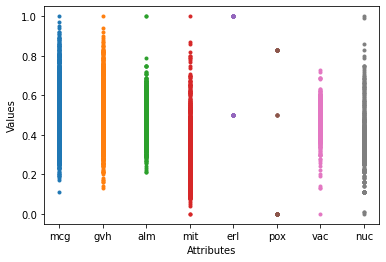

In [12]:
# Graphical frequency distribution of Numerical Attributes 
for a in range(len(num_data)):
    plt.plot(len(data[num_data[a]]) * [a], data[num_data[a]], ".")
    
plt.ylabel("Values")
plt.xlabel("Attributes")
plt.xticks([a for a in range(len(num_data))], num_data)
plt.show()

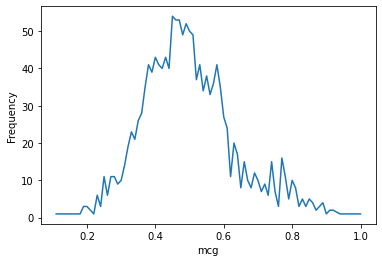

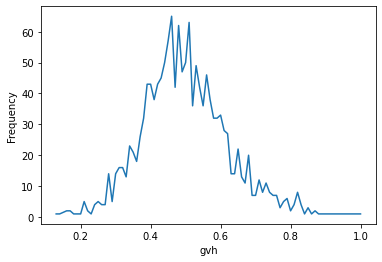

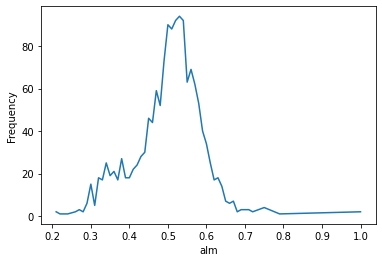

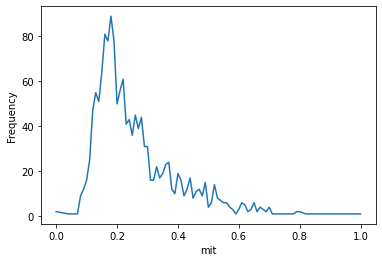

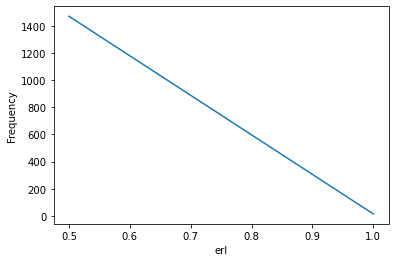

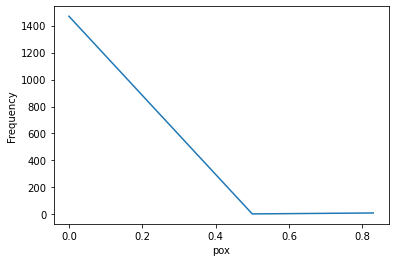

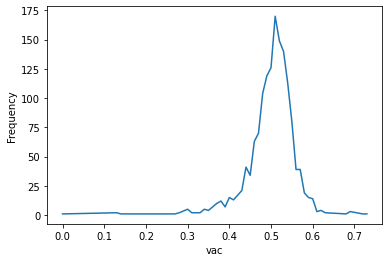

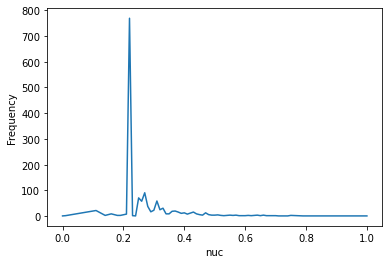

In [13]:
# Frequncy Distribution of each numerical attribute

for attribute in num_data:
    freq_dist = dict.fromkeys(data[attribute].unique(), 0)
    for a in range(len(data[attribute])):
        freq_dist[data[attribute][a]] += 1
        
    x = sorted(data[attribute].unique())
    y = [freq_dist[val] for val in x]
    plt.plot(x, y)
    plt.ylabel("Frequency")
    plt.xlabel(attribute)
    plt.show()


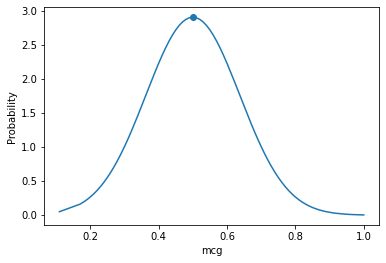

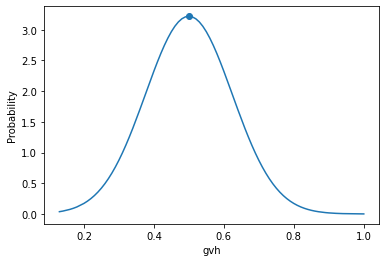

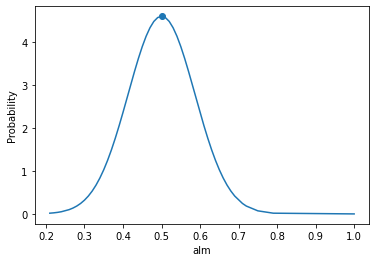

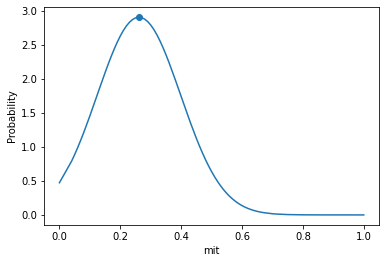

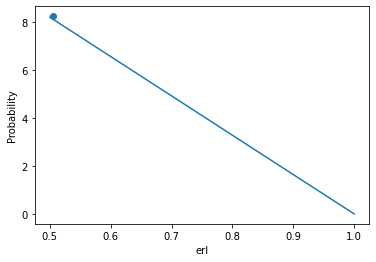

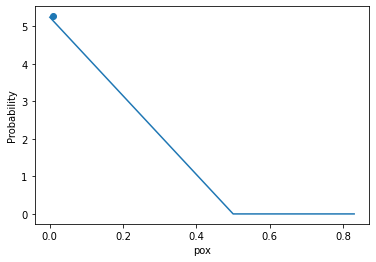

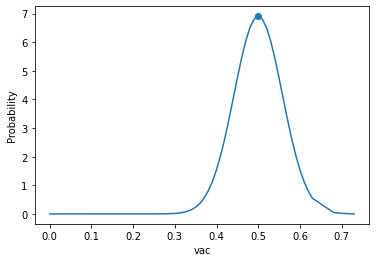

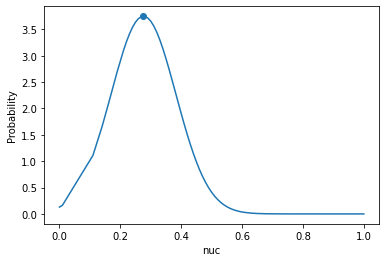

In [14]:
# Normal Distributions
for attribute in num_data:
    arr = sorted(data[attribute])
    mean = np.mean(arr)
    std = np.std(arr)
    pdf = stats.norm.pdf(arr, mean, std)
    plt.plot(arr, pdf)
    plt.scatter(mean, stats.norm.pdf(mean, mean, std))
    plt.ylabel("Probability")
    plt.xlabel(attribute)
    plt.show()

In [15]:
# Measures of Central Tendency

Central = pd.DataFrame(num_data, columns=["Attribute"])
Central["Arithmetic Mean"] = [data[column].mean() for column in num_data]
Central["Mode"] = [data.mode().iloc[0][column] for column in num_data]
Central["Lower Quartile"] = [data[column].quantile(0.25) for column in num_data]
Central["Median"] = [data[column].median() for column in num_data]
Central["Upper Quartile"] = [data[column].quantile(0.75) for column in num_data]

Central.head(len(num_data))

,Attribute,Arithmetic Mean,Mode,Lower Quartile,Median,Upper Quartile
0,mcg,0.500121,0.45,0.41,0.49,0.58
1,gvh,0.499933,0.46,0.42,0.49,0.57
2,alm,0.500034,0.53,0.46,0.51,0.55
3,mit,0.261186,0.18,0.17,0.22,0.32
4,erl,0.504717,0.50,0.50,0.50,0.50
5,pox,0.007500,0.00,0.00,0.00,0.00
6,vac,0.499885,0.51,0.48,0.51,0.53
7,nuc,0.276199,0.22,0.22,0.22,0.30


In [16]:
# Measures of Dispersion

Dispersion = pd.DataFrame(num_data, columns=["Attribute"])
Dispersion["Minimum"] = [data[column].min() for column in num_data]
Dispersion["Maximum"] = [data[column].max() for column in num_data]
Dispersion["Standard Deviation"] = [data[column].std() for column in num_data]
Dispersion["Variance"] = [data[column].std() ** 2 for column in num_data]

Dispersion.head(len(num_data))

,Attribute,Minimum,Maximum,Standard Deviation,Variance
0,mcg,0.11,1.00,0.137299,0.018851
1,gvh,0.13,1.00,0.123924,0.015357
2,alm,0.21,1.00,0.086670,0.007512
3,mit,0.00,1.00,0.137098,0.018796
4,erl,0.50,1.00,0.048351,0.002338
5,pox,0.00,0.83,0.075683,0.005728
6,vac,0.00,0.73,0.057797,0.003340
7,nuc,0.00,1.00,0.106491,0.011340
